<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b>  Thiziri NAIT SAADA  
<b> Student 2:</b>  Irina MOSCHINI 
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [144]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [153]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + 1.0*w1_01) 
o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + 1.0*w1_02) 
o2_1 = sigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*(o2_1 - y) * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01) * 1
dL_w2_11 = 2*(o2_1 - y) * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01) * o1_1#
dL_w2_21 = 2*(o2_1 - y) * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01) * o1_2

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = (2 * (o2_1 - y) * w2_11 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (1 * dsigmoid(x1*w1_11 + x2*w1_21 + 1.0*w1_01))
dL_w1_11 = (2 * (o2_1 - y) * w2_11 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (x1 * dsigmoid(x1*w1_11 + x2*w1_21 + 1.0*w1_01))
dL_w1_21 = (2 * (o2_1 - y) * w2_11 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (x2 * dsigmoid(x1*w1_11 + x2*w1_21 + 1.0*w1_01))
dL_w1_02 = (2 * (o2_1 - y) * w2_21 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (1 * dsigmoid(x1*w1_12 + x2*w1_22 + 1.0*w1_02))
dL_w1_12 = (2 * (o2_1 - y) * w2_21 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (x1 * dsigmoid(x1*w1_12 + x2*w1_22 + 1.0*w1_02))
dL_w1_22 = (2 * (o2_1 - y) * w2_21 * dsigmoid(o1_1*w2_11 + o1_2*w2_21 + 1.0*w2_01)) * (x2 * dsigmoid(x1*w1_12 + x2*w1_22 + 1.0*w1_02))


# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + 1.0*w1_01) 
o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + 1.0*w1_02) 
o2_1 = sigmoid(o1_1*w2_11 + o1_2*w2_21 + w2_01*1.0)

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.2540331790269339
w1_11 = 0.3432265432215471
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192786
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
o = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [154]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]

        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        self.u_hidden = u_1

        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        
        # Compute output of hidden layer 
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden) 
        
        # Compute activations for the output layer
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        
        # Compute output of output layer
        self.o_output = transfer_f(self.u_output) 

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [155]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [296]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
                
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = 2 * (self.o_output - targets) * transfer_df(self.u_output)
        
        # Compute partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden = np.dot(self.W_hidden_to_output[:-1], self.dL_du_output.T).T * transfer_df(self.u_hidden)

        # Compute partial derivative of loss with respect to weights
        dW_input_to_hidden = np.transpose(self.input).dot(self.dL_du_hidden)
        dW_hidden_to_output = (np.transpose(self.o_hidden)).dot(self.dL_du_output)
        
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [297]:
# First define your neural network
model = NeuralNetwork(2, 2, 1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

<b>Reamrk</b>: It is not exactly the same output as there are just 8 digits after the coma here, whereas there were 16 before (more precised). But the result stays very consistent with what was found before. 

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [298]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


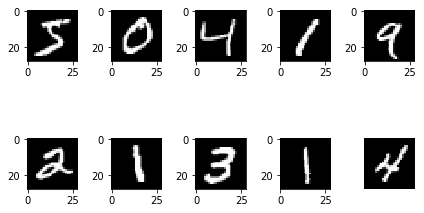

In [299]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [300]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Training and testing the NN with 30 hidden neurons and the learning rate = 0.1
Training time: 23.564724922180176


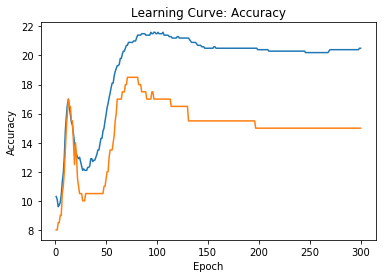

Accuracy with Learning rate = 0.1 :  19.259999999999998 % 

Training and testing the NN with 30 hidden neurons and the learning rate = 1.
Training time: 25.537142038345337


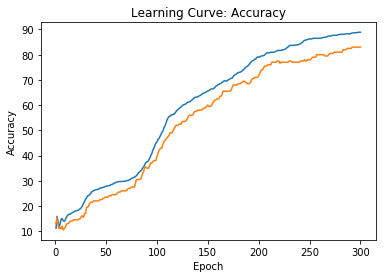

Accuracy with Learning rate = 1. :  83.07 % 

Training and testing the NN with 30 hidden neurons and the learning rate = 10.
Training time: 22.774071216583252


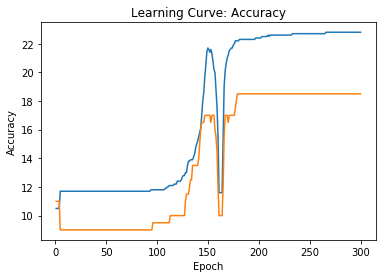

Accuracy with Learning rate = 10. :  21.14 % 



In [302]:
# Train NN and print accuracy on test data
# Learning rate 0.1
print("Training and testing the NN with 30 hidden neurons and the learning rate = 0.1")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 1.
print("Training and testing the NN with 30 hidden neurons and the learning rate = 1.")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 30 hidden neurons and the learning rate = 10.")
mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
print("Accuracy with Learning rate = 10. : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training and testing the NN with 15 hidden neurons and the learning rate = 0.1
Training time: 23.005346059799194


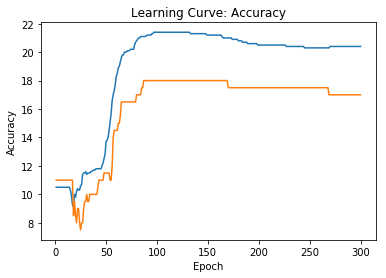

Accuracy with Learning rate = 0.1 :  19.73 % 

Training and testing the NN with 15 hidden neurons and the learning rate = 1.
Training time: 23.269879817962646


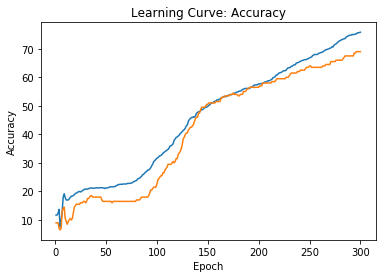

Accuracy with Learning rate = 1. :  71.52 % 

Training and testing the NN with 15 hidden neurons and the learning rate = 10.
Training time: 27.55449390411377


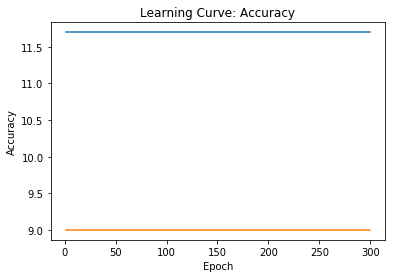

Accuracy with Learning rate = 10. :  10.280000000000001 % 



In [305]:
# Define your neural network
# 15 hidden neurons 

# Define your neural network
mnist_model2 = NeuralNetwork(784, 15, 10)

# Train NN and print accuracy on test data
# Learning rate 0.1
print("Training and testing the NN with 15 hidden neurons and the learning rate = 0.1")
mnist_model2.weights_init()
mnist_model2.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")


# Learning rate 1.
print("Training and testing the NN with 15 hidden neurons and the learning rate = 1.")
mnist_model2.weights_init()
mnist_model2.train(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 15 hidden neurons and the learning rate = 10.")
mnist_model2.weights_init()
mnist_model2.train(small_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
print("Accuracy with Learning rate = 10. : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")

Training and testing the NN with 75 hidden neurons and the learning rate = 0.1
Training time: 25.990952968597412


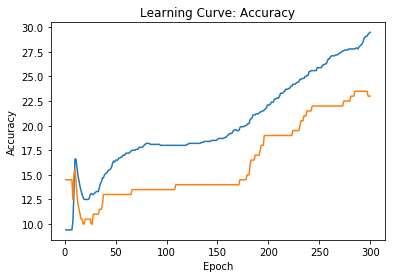

Accuracy with Learning rate = 0.1 :  26.51 % 

Training and testing the NN with 75 hidden neurons and the learning rate = 1.
Training time: 26.257066011428833


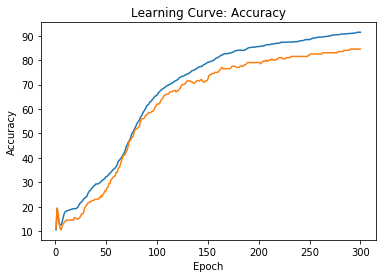

Accuracy with Learning rate = 1. :  84.71 % 

Training and testing the NN with 75 hidden neurons and the learning rate = 10.
Training time: 25.84209895133972


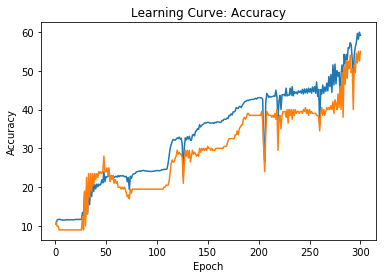

Accuracy with Learning rate = 10. :  52.080000000000005 % 



In [306]:
# 75 hidden neurons
# Define your neural network
mnist_model3 = NeuralNetwork(784, 75, 10)

# Train NN and print accuracy on test data
# Learning rate 0.1
print("Training and testing the NN with 75 hidden neurons and the learning rate = 0.1")
mnist_model3.weights_init()
mnist_model3.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 1.
print("Training and testing the NN with 75 hidden neurons and the learning rate = 1.")
mnist_model3.weights_init()
mnist_model3.train(small_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 75 hidden neurons and the learning rate = 10.")
mnist_model3.weights_init()
mnist_model3.train(small_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
print("Accuracy with Learning rate = 10. : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training and testing the NN with 30 hidden neurons and the learning rate = 0.1 (very small datasets)
Training time: 2.6340227127075195


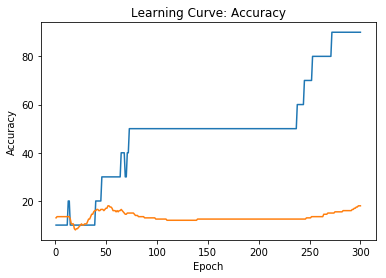

Accuracy with Learning rate = 0.1 :  17.14 % 

Training and testing the NN with 30 hidden neurons and the learning rate = 1. (very small datasets)
Training time: 2.624014139175415


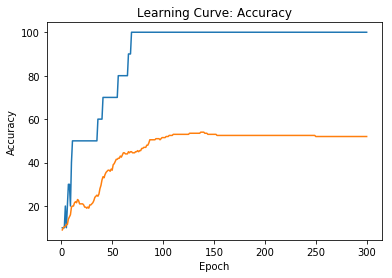

Accuracy with Learning rate = 1. :  51.21 % 

Training and testing the NN with 30 hidden neurons and the learning rate = 10. (very small datasets)
Training time: 2.0007102489471436


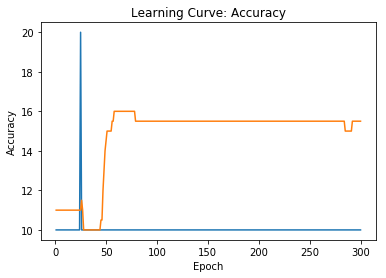

Accuracy with Learning rate = 10. :  12.120000000000001 % 

Training and testing the NN with 15 hidden neurons and the learning rate = 0.1 (very small datasets)
Training time: 2.0634660720825195


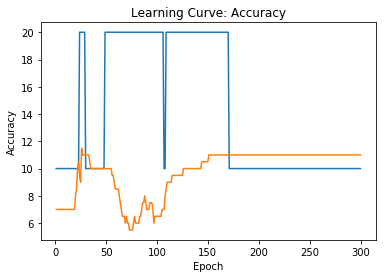

Accuracy with Learning rate = 0.1 :  10.01 % 

Training and testing the NN with 15 hidden neurons and the learning rate = 1. (very small datasets)
Training time: 1.9835929870605469


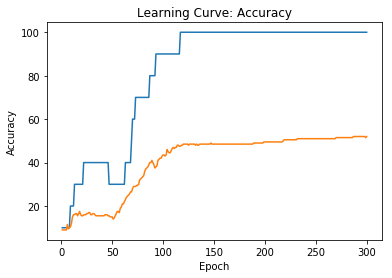

Accuracy with Learning rate = 1. :  51.12 % 

Training and testing the NN with 15 hidden neurons and the learning rate = 10. (very small datasets)
Training time: 2.0700502395629883


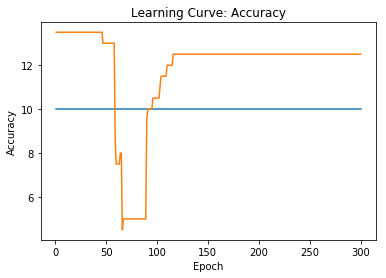

Accuracy with Learning rate = 10. :  10.89 % 

Training and testing the NN with 75 hidden neurons and the learning rate = 0.1 (very small datasets)
Training time: 2.204277992248535


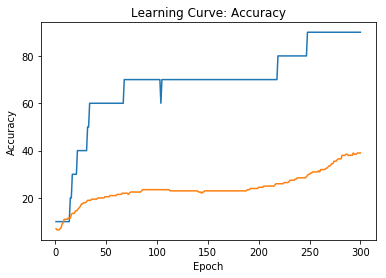

Accuracy with Learning rate = 0.1 :  37.21 % 

Training and testing the NN with 75 hidden neurons and the learning rate = 1. (very small datasets)
Training time: 2.1555798053741455


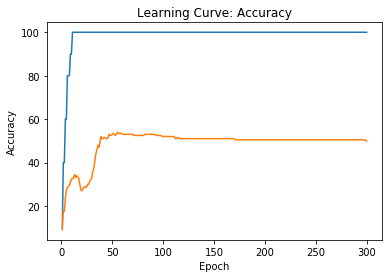

Accuracy with Learning rate = 1. :  50.83 % 

Training and testing the NN with 75 hidden neurons and the learning rate = 10. (very small datasets)
Training time: 2.186223030090332


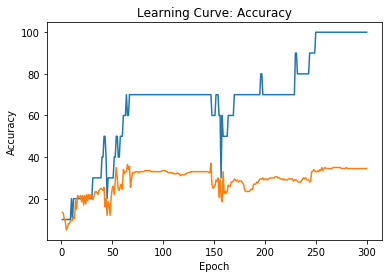

Accuracy with Learning rate = 10. :  39.160000000000004 % 



In [307]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Learning rate 0.1
print("Training and testing the NN with 30 hidden neurons and the learning rate = 0.1 (very small datasets)")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 1.
print("Training and testing the NN with 30 hidden neurons and the learning rate = 1. (very small datasets)")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 30 hidden neurons and the learning rate = 10. (very small datasets)")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
mnist_model.predict(test_data)
print("Accuracy with Learning rate = 10. : ", mnist_model.predict(test_data)/len(test_data[0])*100, "% \n")


# 15 hidden neurons
# Learning rate 0.1
print("Training and testing the NN with 15 hidden neurons and the learning rate = 0.1 (very small datasets)")
mnist_model2.weights_init()
mnist_model2.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 1.
print("Training and testing the NN with 15 hidden neurons and the learning rate = 1. (very small datasets)")
mnist_model2.weights_init()
mnist_model2.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 15 hidden neurons and the learning rate = 10. (very small datasets)")
mnist_model2.weights_init()
mnist_model2.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
print("Accuracy with Learning rate = 10. : ", mnist_model2.predict(test_data)/len(test_data[0])*100, "% \n")


# 75 hidden neurons
# Learning rate 0.1
print("Training and testing the NN with 75 hidden neurons and the learning rate = 0.1 (very small datasets)")
mnist_model3.weights_init()
mnist_model3.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
print("Accuracy with Learning rate = 0.1 : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 1.
print("Training and testing the NN with 75 hidden neurons and the learning rate = 1. (very small datasets)")
mnist_model3.weights_init()
mnist_model3.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1.0, verbose=False)
print("Accuracy with Learning rate = 1. : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

# Learning rate 10.
print("Training and testing the NN with 75 hidden neurons and the learning rate = 10. (very small datasets)")
mnist_model3.weights_init()
mnist_model3.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10, verbose=False)
print("Accuracy with Learning rate = 10. : ", mnist_model3.predict(test_data)/len(test_data[0])*100, "% \n")

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Let's recap the results found for the small training set in this table. Here is the accuracies obtained for differents number of hidden neurons and different learning rates:

|.                    | 15 hidden neurons | 30 hidden neurons | 75 hidden neurons |
|---------------------|-------------------|-------------------|-------------------|
| Learning rate = 0.1 |   19.73%          |    19.26%         |   26.51%          |
| Learning rate = 1.  |   71.52%          |    83.07%         |   84.71%          |
| Learning rate = 10. |   10.28%          |    21.14%         |   52.08%          |

Regardless of the number of hidden neurons, we can see that the best accuracy is found with the <b>learning rate = 1.0</b>. In fact, the bad results obtained with a small learning rate can be explained by the fact that the number of iteration is too small (only 300). Thus, the algorithm convergess toward the good answer (the global minimum), but doesn't have enough time to achieve it. With a large learning rate (10 here), the algorithm is not precise at all (very fluctuant). 

Concerning the number of hidden neurons, we can the that the <b>more neurons we have, the best results we find</b> (regardless of the learning rate).

<i> Remark</i>: These results stay accurate even with the very small training set. Even if the accuracy is not as good, the best neural network is found for a learning rate of 1.0 and 75 hidden neurons.

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Given the previous results obtained, we expect the <b>Neural Network with 75 hidden neurons and a learning rate equals to 1.</b> to achieve the best performances on the whole dataset. Moreover, as the times of execution are quite similar for all of the previous neural networks tested, it is reasonable to chose this one. 

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training and testing the optimal NN on the whole dataset with 75 hidden neurons and the learning rate = 1.
Training time: 1692.7754039764404


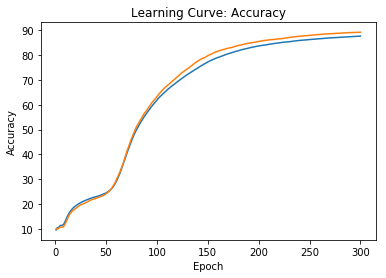

Accuracy with the optimal NN on the whole dataset :  88.46000000000001 % 



In [309]:
mnist_model_optimal = NeuralNetwork(784, 75, 10)

# Train NN and print accuracy on test data
# Learning rate 1.
print("Training and testing the optimal NN on the whole dataset with 75 hidden neurons and the learning rate = 1.")
mnist_model_optimal.weights_init()
mnist_model_optimal.train(training_data, validation_data, iterations=300, learning_rate=1., verbose=False)
print("Accuracy with the optimal NN on the whole dataset : ", mnist_model_optimal.predict(test_data)/len(test_data[0])*100, "% \n")

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: 

<div align="center">$\frac{\partial L_{xe}}{\partial u_i} = - \frac{t_i}{ln(2) * o_i} * \frac{ e^{u_i} * {\sum_{k=1}^n e^{u_k}} - e^{2u_i} }{({\sum_{k=1}^n e^{u_k}})^2} $.</div>

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [123]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]

        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.dot(self.input, self.W_input_to_hidden)
        self.u_hidden = u_1

        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        
        # Compute output of hidden layer 
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden) 
        
        # Compute activations for the output layer
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        
        # Compute output of output layer
        self.o_output = softmax(self.u_output) 

    def backpropagate_xe(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = np.array([- targets[i]/(ln(2)*self.outputs[i]) * (exp(self.u_output[i]) * np.sum(exp(self.u_output)) - exp(2*self.u_output[i])) / (np.sum(exp(self.u_output))**2) for i in range(len(targets))])
        
        # Compute partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden = np.dot(self.dL_du_output, np.dot(transfer_df(self.u_hidden), W_hidden_to_output))

        # Compute partial derivative of loss with respect to weights
        print(W_input_to_hidden.shape)
        
        dW_input_to_hidden = np.dot(self.input, self.dL_du_hidden)
        dW_hidden_to_output = np.transpose(self.dL_du_output * self.o_hidden)

        print(W_input_to_hidden.shape)
        print(dW_input_to_hidden.shape)
        
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)
        

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [ ]:
# Define your neural network
mnist_model_xe = NeuralNetwork(784, 30, 10)

# Train NN and print accuracy on validation data
### PARAMETRES A DEFINIR
mnist_model_xe.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1, verbose=False)
# Train NN and print accuracy on test data

mnist_model_xe.predict(test_data)

In [ ]:
# Print accuracy on test data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>